1. Carga y Exploración de Datos:

    * Descargar y cargar el dataset.
    * Realizar una exploración inicial para entender la estructura del dataset.
    * Identificar valores faltantes, duplicados y outliers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
print("Path to dataset files:", path)
df_original = pd.read_csv(path + "/vehicles.csv")

100%|██████████| 262M/262M [00:02<00:00, 121MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


In [110]:
# Hacemos una copia del DataFrame original
df = df_original.copy()

In [23]:
# Primeros registros
print("Primeros registros")
print(df.head())

Primeros registros
           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       

In [24]:
# Verificamos registros duplicados
print(df.duplicated().sum())

0


In [25]:
# Valores estadísticos básicos
print(df.describe())

                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.

In [26]:
# Verificamos el promedio de registros faltantes
print(df.isnull().mean() * 100)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


In [27]:
print(df['id'].duplicated().sum())

0


In [111]:
# Eliminamos las columnas irrelevantes
df = df.drop(['id', 'url', 'region', 'manufacturer', 'model', 'region_url' ,'county', 'image_url', 'VIN', 'description', 'state', 'posting_date'], axis=1)

In [29]:
# Verificamos el promedio de registros faltantes
print(df.isnull().mean() * 100)

price            0.000000
year             0.282281
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
lat              1.534155
long             1.534155
dtype: float64


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   condition     252776 non-null  object 
 3   cylinders     249202 non-null  object 
 4   fuel          423867 non-null  object 
 5   odometer      422480 non-null  float64
 6   title_status  418638 non-null  object 
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   size          120519 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  lat           420331 non-null  float64
 13  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 45.6+ MB
None


In [112]:
# Agrupación de columnas object
category_columns = df.select_dtypes(include=['object', 'category']).columns

# Corregir inconsistencias en los datos.
for col in category_columns:
    df[col] = df[col].str.lower()

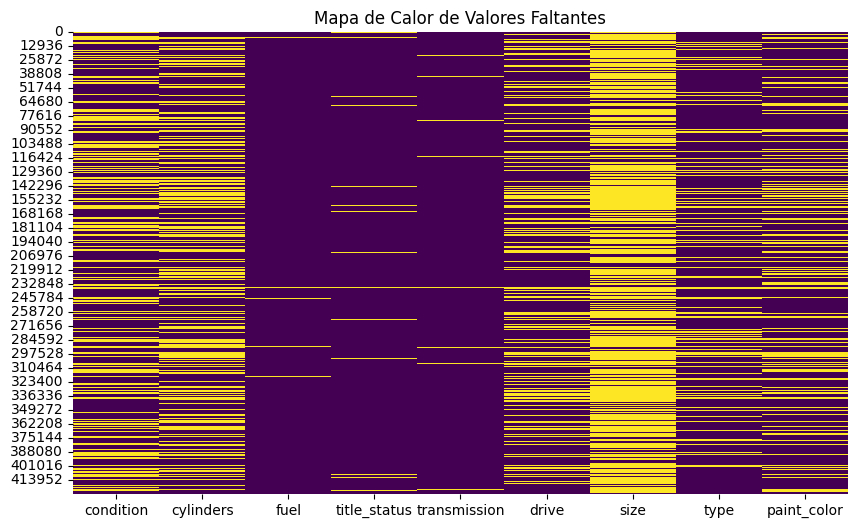

In [113]:
# Visualización de datos categóricos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df[category_columns].isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

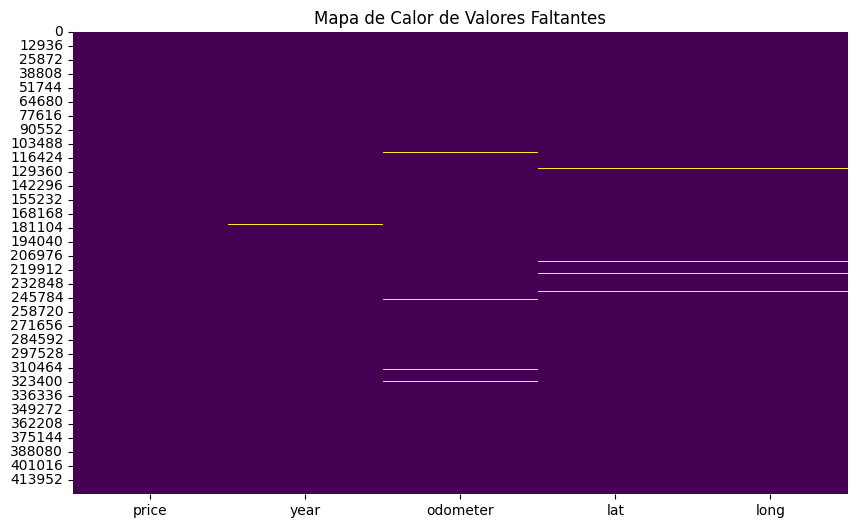

In [114]:
# Visualización de datos numéricos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

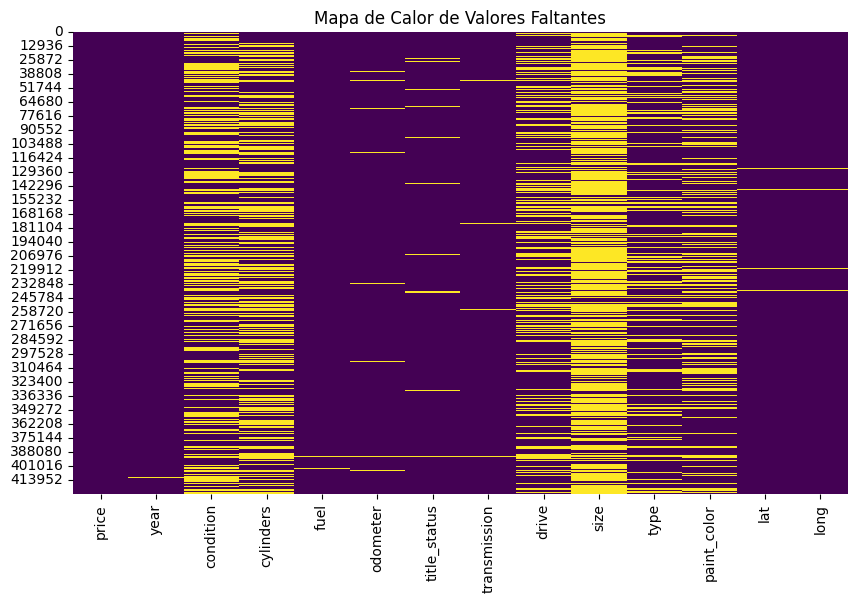

In [50]:
# Visualización de datos totales faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

In [115]:
# Completar datos vacíos de columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [116]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(df[numeric_columns].describe())

              price           year      odometer            lat           long
count  4.268800e+05  426880.000000  4.268800e+05  426880.000000  426880.000000
mean   7.519903e+04    2011.240173  9.791454e+04      38.504007     -94.651702
std    1.218228e+07       9.439234  2.127801e+05       5.797112      18.240566
min    0.000000e+00    1900.000000  0.000000e+00     -84.122245    -159.827728
25%    5.900000e+03    2008.000000  3.813000e+04      34.757016    -111.907973
50%    1.395000e+04    2013.000000  8.554800e+04      39.150100     -88.432600
75%    2.648575e+04    2017.000000  1.330000e+05      42.350000     -81.030000
max    3.736929e+09    2022.000000  1.000000e+07      82.390818     173.885502


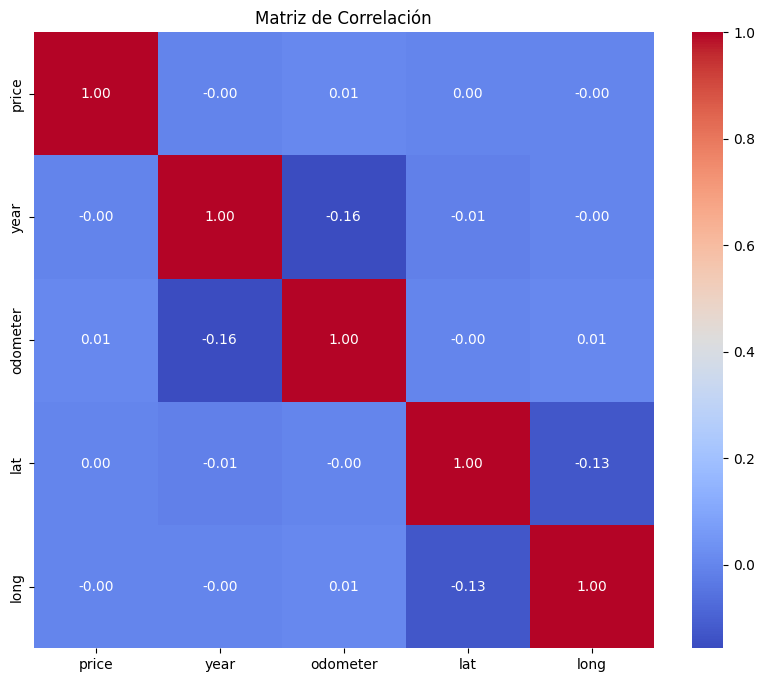

In [89]:
# Correlación de datos numéricos
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [117]:
# Imputar 'unknown' a los valores categóricos faltantes
for col in category_columns:
    df[col] = df[col].fillna('unknown')

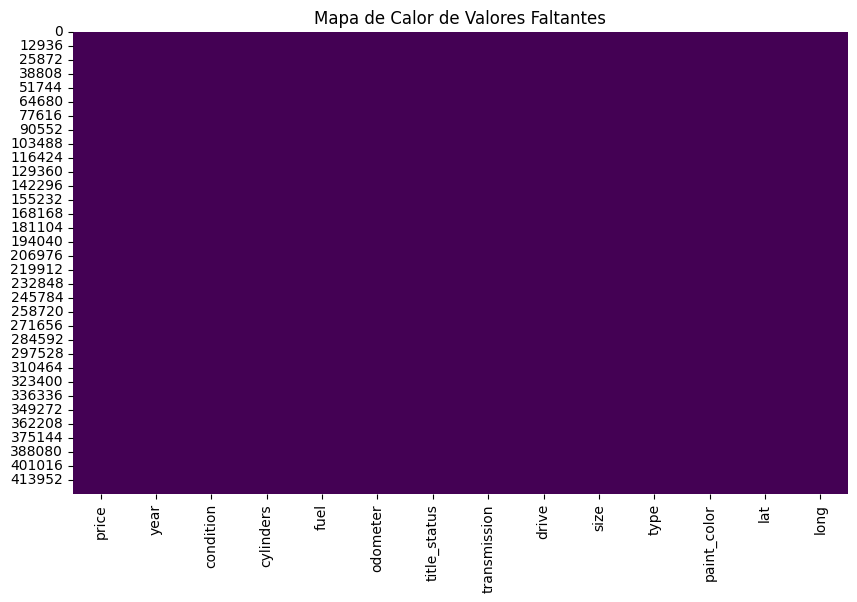

In [91]:
# Nueva visualización de datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

In [118]:
# Eliminar duplicados.
print("Registros duplicados que serán eliminados:")
print(df.duplicated().sum())
df = df.drop_duplicates()

Registros duplicados que serán eliminados:
122336


In [93]:
# Recuento de cuántos precios están en cero
print(df[df['price'] == 0].shape[0])

17785


In [119]:
# Eliminación de filas con precios en cero
print(f"Se eliminaron {df[df['price'] == 0].shape[0]} registros")
df = df[df['price'] != 0]

Se eliminaron 17785 registros


In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 286759 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         286759 non-null  int64  
 1   year          286759 non-null  float64
 2   condition     286759 non-null  object 
 3   cylinders     286759 non-null  object 
 4   fuel          286759 non-null  object 
 5   odometer      286759 non-null  float64
 6   title_status  286759 non-null  object 
 7   transmission  286759 non-null  object 
 8   drive         286759 non-null  object 
 9   size          286759 non-null  object 
 10  type          286759 non-null  object 
 11  paint_color   286759 non-null  object 
 12  lat           286759 non-null  float64
 13  long          286759 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 32.8+ MB
None


In [120]:
# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, numeric_columns)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 22425
Porcentaje de outliers: 7.82%


In [121]:
# Filtrar el DataFrame sin outliers
df = df.drop(index=outlier_indices)

In [122]:
# Convertir objtect a category
df[category_columns] = df[category_columns].astype('category')

In [123]:
# Información de los datos limpios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264334 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         264334 non-null  int64   
 1   year          264334 non-null  float64 
 2   condition     264334 non-null  category
 3   cylinders     264334 non-null  category
 4   fuel          264334 non-null  category
 5   odometer      264334 non-null  float64 
 6   title_status  264334 non-null  category
 7   transmission  264334 non-null  category
 8   drive         264334 non-null  category
 9   size          264334 non-null  category
 10  type          264334 non-null  category
 11  paint_color   264334 non-null  category
 12  lat           264334 non-null  float64 
 13  long          264334 non-null  float64 
dtypes: category(9), float64(4), int64(1)
memory usage: 14.4 MB


 2. Limpieza y Preprocesamiento:

    * Manejar valores faltantes.
    * Eliminar duplicados.
    * Corregir inconsistencias en los datos categóricos.
    * Escalar las características numéricas.
    * Realizar transformaciones necesarias para las características categóricas.

In [124]:
from sklearn.preprocessing import OneHotEncoder

# Instancia del codificador OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Codifico y transformo las variables categóricas
encoded_data = encoder.fit_transform(df[category_columns])

# Creo un DataFrame con las variables codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(category_columns))

# Reinicio el índice de encoded_df para que coincida con df
encoded_df.index = df.index

# Creo un DataFrame combinado con las columnas numéricas y las columnas codificadas
df_transf = pd.concat([df.select_dtypes(include=['float64', 'int64']), encoded_df], axis=1)

# Resultado: el DataFrame `df_transf` contiene solo las columnas numéricas y las variables codificadas
df_transf

,price,year,odometer,lat,long,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,6000,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11900,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21000,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1500,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4900,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426871,17990,2018.0,34239.0,33.786500,-84.445400,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426872,32590,2020.0,19059.0,33.779214,-84.411811,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426873,30990,2018.0,15080.0,33.779214,-84.411811,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426878,28990,2018.0,30112.0,33.786500,-84.445400,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


*  División del conjunto de datos en entrenamiento y prueba.

In [125]:
from sklearn.model_selection import train_test_split

# DataFrame para valores numericos
df_transf_v1 = df_transf.copy()

# Separar las características (X) y la variable objetivo (y)
X = df_transf_v1.drop(['price'], axis=1)
y = df_transf_v1['price']

# Dividir los datos en conjunto de entrenamiento (80%) y de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Escalar las características numéricas.

In [126]:
# Escalar características numéricas sin incluir la columna objetivo 'price'
from sklearn.preprocessing import StandardScaler

# Escalar las columnas numéricas en X_train y X_test después de codificar con One-Hot
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 3. Exploración de Datos:

    * Crear visualizaciones univariadas y multivariadas.
    * Calcular estadísticas descriptivas.

In [127]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 264334 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         264334 non-null  int64   
 1   year          264334 non-null  float64 
 2   condition     264334 non-null  category
 3   cylinders     264334 non-null  category
 4   fuel          264334 non-null  category
 5   odometer      264334 non-null  float64 
 6   title_status  264334 non-null  category
 7   transmission  264334 non-null  category
 8   drive         264334 non-null  category
 9   size          264334 non-null  category
 10  type          264334 non-null  category
 11  paint_color   264334 non-null  category
 12  lat           264334 non-null  float64 
 13  long          264334 non-null  float64 
dtypes: category(9), float64(4), int64(1)
memory usage: 14.4 MB
None


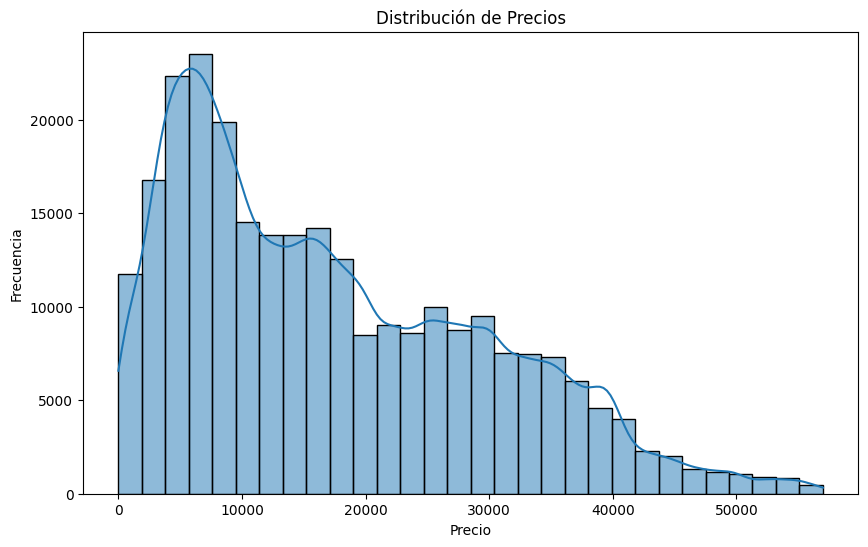

In [133]:
# Visualización univariada
plt.figure(figsize=(10, 6))
sns.histplot(df_transf_v1['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


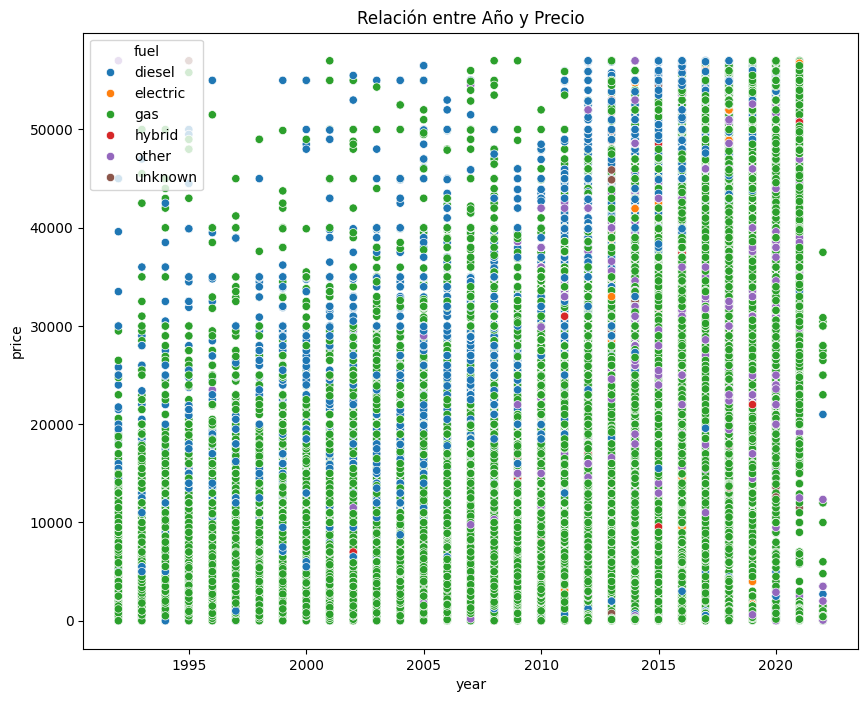

In [137]:
# Visualización multivariada con df limpio. No utilizo el df transformado debido a que allí no existen categorías
plt.figure(figsize=(10, 8))
sns.scatterplot(x='year', y='price', hue='fuel', data=df)
plt.title('Relación entre Año y Precio')
plt.show()

* Calcular estadísticas descriptivas.

In [103]:
# Estadísticas descriptivas para variables numéricas en X
print("Estadísticas descriptivas para columnas numéricas en X (df transformado):")
print(X.describe())

# Mediana de variables numéricas en X
print("\n\nMediana de columnas numéricas en X (df transformado):")
print(X.median(numeric_only=True))

# Moda de cada columna en X
print("\n\nModa de cada columna en X (df transformado):")
print(X.mode().iloc[0])

# Matriz de correlación para variables numéricas en X
print("\n\nMatriz de correlación en X (df transformado):")
print(X.corr())

Estadísticas descriptivas para columnas numéricas en X (df transformado):
                year      odometer            lat           long  \
count  286759.000000  2.867590e+05  286759.000000  286759.000000   
mean     2010.517616  9.895578e+04      38.262194     -93.848571   
std        10.353851  2.184157e+05       5.767688      17.772486   
min      1900.000000  0.000000e+00     -84.122245    -159.827728   
25%      2007.000000  3.500000e+04      34.419700    -106.599700   
50%      2013.000000  8.500800e+04      39.126300     -87.979335   
75%      2017.000000  1.361900e+05      42.201075     -80.672822   
max      2022.000000  1.000000e+07      82.390818     173.885502   

       condition_fair  condition_good  condition_like new  condition_new  \
count   286759.000000   286759.000000       286759.000000  286759.000000   
mean         0.022671        0.361757            0.054889       0.003306   
std          0.148851        0.480510            0.227764       0.057402   
min      

 4. Modelado y Evaluación:

    * Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
    * Evaluar los modelos utilizando MSE, RMSE, y R^2.
    * Seleccionar el mejor modelo basado en las métricas de evaluación.

Regresión Lineal

In [139]:
# Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializa y entrena el modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicción
y_pred_linear = linear_model.predict(X_test)

# Evaluación
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")

Linear Regression:
MSE: 54706679.91
RMSE: 7396.40
R²: 0.65


Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

# Inicializa y entrena el modelo
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test)

# Evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest Regressor:
MSE: 25294965.36
RMSE: 5029.41
R²: 0.84


* Seleccionar el mejor modelo basado en las métricas de evaluación.

In [ ]:
"""De acuerdo a los resultados; el Random Forest Regressor claramente supera al Linear Regression en todas las métricas"""

'De acuerdo a los resultados; el Random Forest Regressor claramente supera al Linear Regression en todas las métricas'

 5. Optimización del Modelo:

    * Optimizar el modelo seleccionado utilizando GridSearchCV.

* Optimización con Linear Regression

In [143]:
from sklearn.model_selection import GridSearchCV

# Defino el modelo que utilizaré
model_linear = LinearRegression()

param_grid_linear = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [144]:
# Configuración de GridSearchCV para Linear Regression
grid_search_linear = GridSearchCV(
    estimator=model_linear,
    param_grid=param_grid_linear,
    cv=5,                               # Validación cruzada de 5 pliegues
    scoring='neg_mean_squared_error',   # Métrica a optimizar (MSE negativo)
    n_jobs=-1                           # Usa todos los núcleos disponibles
)

In [145]:
# Entrenamiento de GridSearchCV
grid_search_linear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [146]:
# Mejor modelo y mejores parámetros
best_model_linear = grid_search_linear.best_estimator_
best_params_linear = grid_search_linear.best_params_
print("Mejores parámetros para Linear Regression:")
print(best_params_linear)

Mejores parámetros para Linear Regression:
{'copy_X': True, 'fit_intercept': True}


In [147]:
# Entrenamiento del mejor modelo obtenido de GridSearchCV
best_model_linear.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_linear = best_model_linear.predict(X_test)

In [148]:
# Evaluación del modelo con métricas
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [151]:
# Resultados
print("Mejor modelo de Linear Regression:")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")

Mejor modelo de Linear Regression:
MSE: 54706679.91
RMSE: 7396.40
R²: 0.65


* Optimización con Random Forest Regressor

In [157]:
from sklearn.model_selection import RandomizedSearchCV
# Defino el modelo que utilizaré
model_rf = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [161]:
# Configuración de GridSearchCV para Randon Forest Regressor
grid_search_rf = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_grid_rf,
    scoring='neg_mean_squared_error',   # Métrica a optimizar (MSE negativo)
    cv=5,                               # Validación cruzada de 5 pliegues
    n_jobs=1,                           # Usa todos los núcleos disponibles
    random_state=42,                    # Semilla aleatoria para reproducibilidad
    n_iter=5,                           # Número de iteraciones aleatorias
    verbose=2                           # Nivel de verbosidad
)

In [162]:
# Entrenamiento
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 4.2min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.8min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.8min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 2.4min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 2.4min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 2.4min

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [163]:
# Hacer predicciones en el conjunto de prueba
y_pred_rf = grid_search_rf.predict(X_test)

In [164]:
# Evaluar el modelo con métricas
mse_best_rf = mean_squared_error(y_test, y_pred_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_rf)

In [165]:
# Resultados
print("Mejor modelo de Random Forest Regressor:")
print(f"MSE: {mse_best_rf:.2f}")
print(f"RMSE: {rmse_best_rf:.2f}")
print(f"R²: {r2_best_rf:.2f}")

Mejor modelo de Random Forest Regressor:
MSE: 41606989.90
RMSE: 6450.35
R²: 0.74


6. Documentación y Entrega:
    * Documentar todo el proceso en un archivo .ipynb claramente comentado.
    * Crear visualizaciones con interpretaciones.

* Gráfico de Errores Residuales

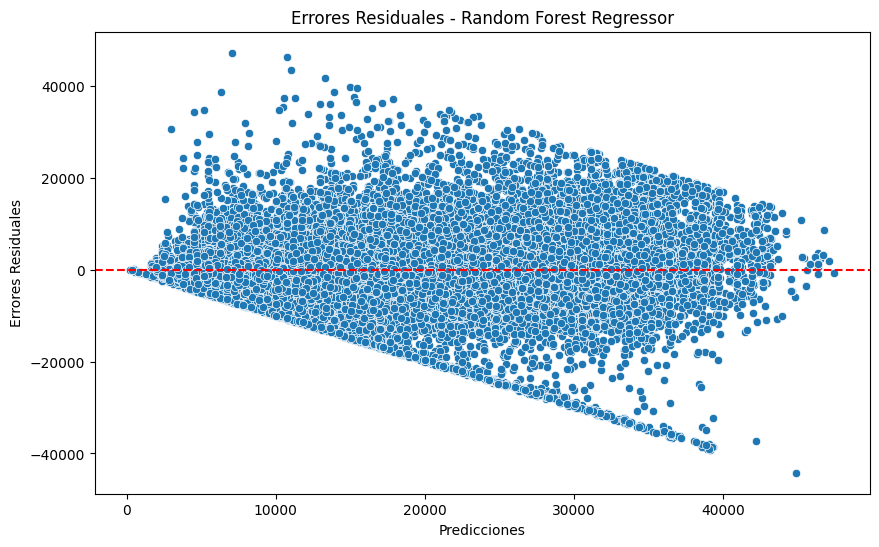

In [166]:
# Calcular los errores residuales
residuals = y_test - y_pred_rf

# Gráfico de Errores Residuales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Errores Residuales - Random Forest Regressor')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.show()

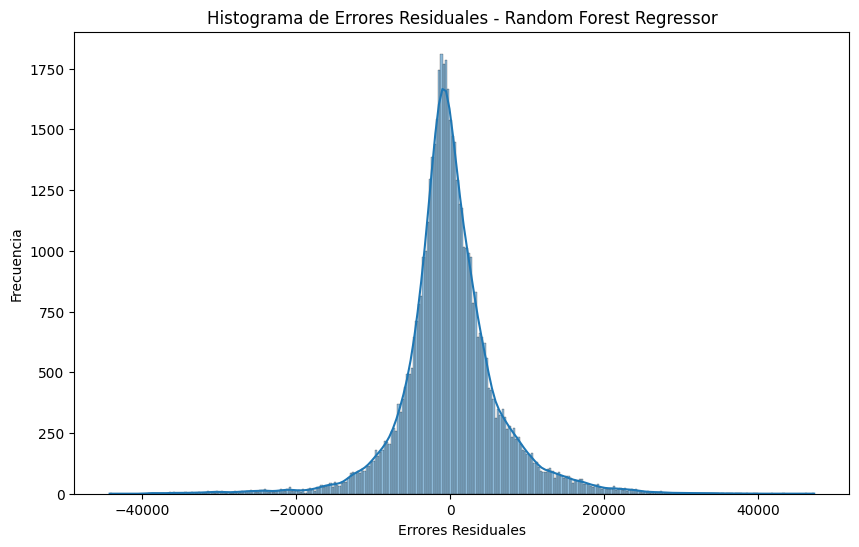

In [167]:
# Histograma de errores residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de Errores Residuales - Random Forest Regressor')
plt.xlabel('Errores Residuales')
plt.ylabel('Frecuencia')
plt.show()

* Gráfico de Predicciones vs. Valores Reales

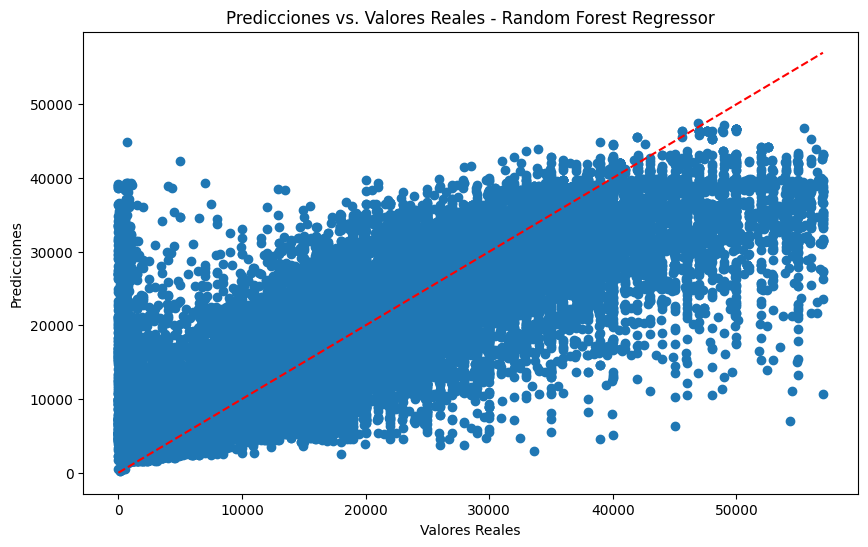

In [168]:
# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales - Random Forest Regressor')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()